In [120]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [121]:
file_url = "C:\\Users\\i.bermejo\\Documents\\Data\\MedicationReconciliation\\PreprocessedData.csv"
dataframe = pd.read_csv(file_url)

In [122]:
dataframe.shape

(1526, 180)

In [123]:
dataframe.head()

,id,sex,age,n_diseases,diseases,eGFR,n_visits_out_all_12m_MUMC,in_all_12m_MUMC,n_ER_12m_MUMC,n_visits_out_current_specialty_12m_MUMC.cat,...,prevented_consequences.F_1,prevented_consequences.G_1,prevented_consequences.H_1,prevented_consequences.I_1,information_gained.yes_direct_1,information_gained.yes_indirect_1,information_gained.no_1,y.interaction,y.revision_wo_interaction,y
0,w7DXu1IzfC,female,56,NaN,NaN,60-89 ml/min,> 5,no,0,3+,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0,0,0
1,kkcuBd72WA,female,68,3.0,"1,3,4",15-29 ml/min,1,yes,2,1,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0,0,0
2,O8Ss3eOnMD,female,36,NaN,NaN,unknown or measured more than 12 months ago,1,no,0,1,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0,0,0
3,ntN2M82pwD,female,71,1.0,2,30-59 ml/min,> 5,no,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,Mmq8YLjTdy,male,49,NaN,NaN,> 90 ml/min,0,no,0,3+,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0,0,0


In [124]:
dataframe.columns

Index(['id', 'sex', 'age', 'n_diseases', 'diseases', 'eGFR',
       'n_visits_out_all_12m_MUMC', 'in_all_12m_MUMC', 'n_ER_12m_MUMC',
       'n_visits_out_current_specialty_12m_MUMC.cat',
       ...
       'prevented_consequences.F_1', 'prevented_consequences.G_1',
       'prevented_consequences.H_1', 'prevented_consequences.I_1',
       'information_gained.yes_direct_1', 'information_gained.yes_indirect_1',
       'information_gained.no_1', 'y.interaction', 'y.revision_wo_interaction',
       'y'],
      dtype='object', length=180)

In [125]:
dataframe['in_all_12m_MUMC'].unique()

array(['no', 'yes'], dtype=object)

In [236]:
dataframe['out_specialty_current_MUMC.cardiology_1'].value_counts()

0    1407
1     119
Name: out_specialty_current_MUMC.cardiology_1, dtype: int64

In [127]:
dataframe = dataframe.fillna(0)
dataframe['n_diseases'] = dataframe['n_diseases'].astype(int)
dataframe['n_visits_out_current_specialty_12m_MUMC_1'] =  np.where(dataframe['n_visits_out_current_specialty_12m_MUMC.cat']== '1', 1, 0)
dataframe['n_visits_out_current_specialty_12m_MUMC_2'] =  np.where(dataframe['n_visits_out_current_specialty_12m_MUMC.cat']== '2', 1, 0)
dataframe['n_visits_out_current_specialty_12m_MUMC_3plus'] =  np.where(dataframe['n_visits_out_current_specialty_12m_MUMC.cat']== '3+', 1, 0)



In [172]:
df = dataframe[['sex.male_1',
    'diseases.diabetes_1',
    'diseases.rheumatoid_arthritis_1',
    'diseases.asthma_COPD_1',
    'diseases.cardiovascular_disease_1',
    'diseases.cardiac_arrhythmia_1',
    'diseases.heart_failure_1',
    'diseases.cancer_1',
    'diseases.none_of_the_above_1',
    'eGFR.above_90_1',
    'eGFR.60_89_1',
    'eGFR.30_59_1',
    'eGFR.15_29_1',
    'eGFR.below_15_1',
    'eGFR.NA_1',
    'n_visits_out_all_12m_MUMC.0_1',
    'n_visits_out_all_12m_MUMC.1_1',
    'n_visits_out_all_12m_MUMC.2_to_5_1',
    'n_visits_out_all_12m_MUMC.above_5_1',
    'inout_specialty_12m_MUMC.cardiology_1',
    'inout_specialty_12m_MUMC.urology_1',
    'inout_specialty_12m_MUMC.psychiatry_1',
    'inout_specialty_12m_MUMC.otorhinolaryngology_1',
    'inout_specialty_12m_MUMC.ophthalmology_1',
    'inout_specialty_12m_MUMC.internal_medicine_1',
    'inout_specialty_12m_MUMC.surgery_1',
    'inout_specialty_12m_MUMC.orthopedics_1',
    'inout_specialty_12m_MUMC.plastic_surgery_1',
    'inout_specialty_12m_MUMC.obstetrics_and_gynaecology_1',
    'inout_specialty_12m_MUMC.neurology_1',
    'inout_specialty_12m_MUMC.dermatology_1',
    'inout_specialty_12m_MUMC.gastroenterology_1',
    'inout_specialty_12m_MUMC.pneumology_1',
    'inout_specialty_12m_MUMC.rheumatology_1',
    'inout_specialty_12m_MUMC.do_not_select_1',
    'inout_specialty_12m_MUMC.pediatrics_1',
    'inout_specialty_12m_MUMC.anesthesiology_1',
    'inout_specialty_12m_MUMC.other_1',
    'in_all_12m_MUMC.yes_1',
    'ER_12m_MUMC.yes_1',
    'high_risk_medications.platelet_aggregation_inhibitors_1',
    'high_risk_medications.anticoagulants_1',
    'high_risk_medications.NSAIDs_1',
    'high_risk_medications.diuretics_1',
    'high_risk_medications.RAS_inhibitors_1',
    'high_risk_medications.systemic_corticosteroids_1',
    'high_risk_medications.opioids_1',
    'high_risk_medications.glucose_lowering_medications_1',
    'high_risk_medications.psychotropics_1',
    'high_risk_medications.cardiac_medications_1',
    'high_risk_medications.immunosuppressants_1',
    'high_risk_medications.oncolytics_1',
    'high_risk_medications.yes_1',
    'out_specialty_current_MUMC.cardiology_1',
    'out_specialty_current_MUMC.surgery_1',
    'out_specialty_current_MUMC.surgery_hpb_1',
    'out_specialty_current_MUMC.surgery_trauma_1',
    'out_specialty_current_MUMC.surgery_cardiovascular_1',
    'out_specialty_current_MUMC.surgery_composite_1',
    'out_specialty_current_MUMC.dermatology_1',
    'out_specialty_current_MUMC.internal_medicine_vascular_1',
    'out_specialty_current_MUMC.internal_medicine_D_1',
    'out_specialty_current_MUMC.internal_medicine_general_1',
    'out_specialty_current_MUMC.internal_medicine_geriatrics_1',
    'out_specialty_current_MUMC.internal_medicine_composite_1',
    'out_specialty_current_MUMC.neurology_vascular_1',
    'out_specialty_current_MUMC.neurology_1',
    'out_specialty_current_MUMC.neurology_composite_1',
    'out_specialty_current_MUMC.rheumatology_SPA_1',
    'out_specialty_current_MUMC.rheumatology_1',
    'out_specialty_current_MUMC.rheumatology_composite_1',
    'out_specialty_current_MUMC.urology_functional_1',
    'out_specialty_current_MUMC.urology_oncology_1',
    'out_specialty_current_MUMC.urology_composite_1',
    'housing.independent_1',
    'housing.home_care_1',
    'housing.institution_1',
    'patient_reported_medication_use.yes_1',
    'pill_box.week.yes_1',
    'person_responsible_for_medications.patient_1',
    'person_responsible_for_medications.partner_or_caregiver_1',
    'person_responsible_for_medications.health_professional_1',
    'education.type_1_1',
    'education.type_2_1',
    'education.type_3_1',
    'education.type_4_1',
    'allergy_medication.yes_1',
    'visit_12m_external_hospital.yes_1',
    'inout_specialty_12m_external_hospital.cardiology_1',
    'inout_specialty_12m_external_hospital.urology_1',
    'inout_specialty_12m_external_hospital.psychiatry_1',
    'inout_specialty_12m_external_hospital.otorhinolaryngology_1',
    'inout_specialty_12m_external_hospital.ophthalmology_1',
    'inout_specialty_12m_external_hospital.internal_medicine_1',
    'inout_specialty_12m_external_hospital.surgery_1',
    'inout_specialty_12m_external_hospital.orthopedics_1',
    'inout_specialty_12m_external_hospital.plastic_surgery_1',
    'inout_specialty_12m_external_hospital.obstetrics_and_gynaecology_1',
    'inout_specialty_12m_external_hospital.neurology_1',
    'inout_specialty_12m_external_hospital.dermatology_1',
    'inout_specialty_12m_external_hospital.gastroenterology_1',
    'inout_specialty_12m_external_hospital.pneumology_1',
    'inout_specialty_12m_external_hospital.rheumatology_1',
    'inout_specialty_12m_external_hospital.do_not_select_1',
    'inout_specialty_12m_external_hospital.pediatrics_1',
    'inout_specialty_12m_external_hospital.anesthesiology_1',
    'inout_specialty_12m_external_hospital.other_1',
    'in_all_12m_external_hospital.yes_1',
    'ER_12m_external_hospital.yes_1',
    'medication_wo_prescription.NSAIDs_1',
    'medication_wo_prescription.proton_pump_inhibitors_1',
    'medication_wo_prescription.hypericum_1',
    'medication_wo_prescription.red_yeast_rice_1',
    'medication_wo_prescription.multi_vitamins_dietary_supplement_1',
    'medication_wo_prescription.other_1',
    'medication_wo_prescription.none_1',
    'NSAIDs_composite_1',
    'medication_literacy.adequate_1',
    'medication_literacy.suboptimal_1',
    'medication_literacy.insufficient_1',
    'medication_prescribed_during_consult.yes_1',
    'medication_prescribed_during_consult.new_1',
    'medication_stopped_during_consult.yes_1',
    'non_medication_intervention_during_consult.yes_1']]

Preprocessing

In [173]:
for column in df.columns:
    print(column, ":", df[column].unique())

sex.male_1 : [0 1]
diseases.diabetes_1 : [0 1]
diseases.rheumatoid_arthritis_1 : [0 1]
diseases.asthma_COPD_1 : [0 1]
diseases.cardiovascular_disease_1 : [0 1]
diseases.cardiac_arrhythmia_1 : [0 1]
diseases.heart_failure_1 : [0 1]
diseases.cancer_1 : [0 1]
diseases.none_of_the_above_1 : [0]
eGFR.above_90_1 : [0 1]
eGFR.60_89_1 : [1 0]
eGFR.30_59_1 : [0 1]
eGFR.15_29_1 : [0 1]
eGFR.below_15_1 : [0 1]
eGFR.NA_1 : [0 1]
n_visits_out_all_12m_MUMC.0_1 : [0 1]
n_visits_out_all_12m_MUMC.1_1 : [0 1]
n_visits_out_all_12m_MUMC.2_to_5_1 : [0 1]
n_visits_out_all_12m_MUMC.above_5_1 : [1 0]
inout_specialty_12m_MUMC.cardiology_1 : [0 1]
inout_specialty_12m_MUMC.urology_1 : [0 1]
inout_specialty_12m_MUMC.psychiatry_1 : [0 1]
inout_specialty_12m_MUMC.otorhinolaryngology_1 : [0 1]
inout_specialty_12m_MUMC.ophthalmology_1 : [0 1]
inout_specialty_12m_MUMC.internal_medicine_1 : [0 1]
inout_specialty_12m_MUMC.surgery_1 : [0 1]
inout_specialty_12m_MUMC.orthopedics_1 : [1 0]
inout_specialty_12m_MUMC.plastic_s

In [131]:
for column in df.columns:
    print(column, " = keras.Input(shape=(1,), name=\"", column, "\", dtype=\"int64\")")

age  = keras.Input(shape=(1,), name=" age ", dtype="int64")
n_diseases  = keras.Input(shape=(1,), name=" n_diseases ", dtype="int64")
n_ER_12m_MUMC  = keras.Input(shape=(1,), name=" n_ER_12m_MUMC ", dtype="int64")
n_medications  = keras.Input(shape=(1,), name=" n_medications ", dtype="int64")
n_ER_12m_external_hospital  = keras.Input(shape=(1,), name=" n_ER_12m_external_hospital ", dtype="int64")
medication_literacy  = keras.Input(shape=(1,), name=" medication_literacy ", dtype="int64")
medication_prescribed_during_consult.new  = keras.Input(shape=(1,), name=" medication_prescribed_during_consult.new ", dtype="int64")
medication_stopped_during_consult.yes_no  = keras.Input(shape=(1,), name=" medication_stopped_during_consult.yes_no ", dtype="int64")
non_medication_intervention_during_consult  = keras.Input(shape=(1,), name=" non_medication_intervention_during_consult ", dtype="int64")
warnings  = keras.Input(shape=(1,), name=" warnings ", dtype="int64")
medications_interaction  = keras

In [160]:
# Categorical features encoded as integers
sex = keras.Input(shape=(1,), name="sex.male_1", dtype="int64")
diseases_diabetes = keras.Input(shape=(1,), name="diseases.diabetes_1", dtype="int64")
diseases_rheumatoid_arthritis = keras.Input(shape=(1,), name="diseases.rheumatoid_arthritis_1", dtype="int64")
diseases_asthma_COPD = keras.Input(shape=(1,), name="diseases.asthma_COPD_1", dtype="int64")
diseases_cardiovascular_disease = keras.Input(shape=(1,), name="diseases.cardiovascular_disease_1", dtype="int64")
diseases_cardiac_arrhythmia = keras.Input(shape=(1,), name="diseases.cardiac_arrhythmia_1", dtype="int64")
diseases_heart_failure = keras.Input(shape=(1,), name="diseases.heart_failure_1", dtype="int64")
diseases_cancer  = keras.Input(shape=(1,), name="diseases.cancer_1", dtype="int64")
diseases_none_of_the_above = keras.Input(shape=(1,), name="diseases.none_of_the_above_1", dtype="int64")
eGFR_above_90_1  = keras.Input(shape=(1,), name="eGFR.above_90_1", dtype="int64")
eGFR_60_89_1  = keras.Input(shape=(1,), name="eGFR.60_89_1", dtype="int64")
eGFR_30_59_1  = keras.Input(shape=(1,), name="eGFR.30_59_1", dtype="int64")
eGFR_15_29_1  = keras.Input(shape=(1,), name="eGFR.15_29_1", dtype="int64")
eGFR_below_15_1  = keras.Input(shape=(1,), name="eGFR.below_15_1", dtype="int64")
eGFR_NA_1  = keras.Input(shape=(1,), name="eGFR.NA_1", dtype="int64")
n_visits_out_all_12m_MUMC_0_1  = keras.Input(shape=(1,), name="n_visits_out_all_12m_MUMC.0_1", dtype="int64")
n_visits_out_all_12m_MUMC_1_1  = keras.Input(shape=(1,), name="n_visits_out_all_12m_MUMC.1_1", dtype="int64")
n_visits_out_all_12m_MUMC_2_to_5_1  = keras.Input(shape=(1,), name="n_visits_out_all_12m_MUMC.2_to_5_1", dtype="int64")
n_visits_out_all_12m_MUMC_above_5_1  = keras.Input(shape=(1,), name="n_visits_out_all_12m_MUMC.above_5_1", dtype="int64")
inout_specialty_12m_MUMC_cardiology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.cardiology_1", dtype="int64")
inout_specialty_12m_MUMC_urology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.urology_1", dtype="int64")
inout_specialty_12m_MUMC_psychiatry_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.psychiatry_1", dtype="int64")
inout_specialty_12m_MUMC_otorhinolaryngology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.otorhinolaryngology_1", dtype="int64")
inout_specialty_12m_MUMC_ophthalmology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.ophthalmology_1", dtype="int64")
inout_specialty_12m_MUMC_internal_medicine_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.internal_medicine_1", dtype="int64")
inout_specialty_12m_MUMC_surgery_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.surgery_1", dtype="int64")
inout_specialty_12m_MUMC_orthopedics_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.orthopedics_1", dtype="int64")
inout_specialty_12m_MUMC_plastic_surgery_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.plastic_surgery_1", dtype="int64")
inout_specialty_12m_MUMC_obstetrics_and_gynaecology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.obstetrics_and_gynaecology_1", dtype="int64")
inout_specialty_12m_MUMC_neurology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.neurology_1", dtype="int64")
inout_specialty_12m_MUMC_dermatology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.dermatology_1", dtype="int64")
inout_specialty_12m_MUMC_gastroenterology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.gastroenterology_1", dtype="int64")
inout_specialty_12m_MUMC_pneumology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.pneumology_1", dtype="int64")
inout_specialty_12m_MUMC_rheumatology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.rheumatology_1", dtype="int64")
inout_specialty_12m_MUMC_do_not_select_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.do_not_select_1", dtype="int64")
inout_specialty_12m_MUMC_pediatrics_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.pediatrics_1", dtype="int64")
inout_specialty_12m_MUMC_anesthesiology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.anesthesiology_1", dtype="int64")
inout_specialty_12m_MUMC_other_1  = keras.Input(shape=(1,), name="inout_specialty_12m_MUMC.other_1", dtype="int64")
in_all_12m_MUMC_yes_1  = keras.Input(shape=(1,), name="in_all_12m_MUMC.yes_1", dtype="int64")
ER_12m_MUMC_yes_1  = keras.Input(shape=(1,), name="ER_12m_MUMC.yes_1", dtype="int64")
high_risk_medications_platelet_aggregation_inhibitors_1  = keras.Input(shape=(1,), name="high_risk_medications.platelet_aggregation_inhibitors_1", dtype="int64")
high_risk_medications_anticoagulants_1  = keras.Input(shape=(1,), name="high_risk_medications.anticoagulants_1", dtype="int64")
high_risk_medications_NSAIDs_1  = keras.Input(shape=(1,), name="high_risk_medications.NSAIDs_1", dtype="int64")
high_risk_medications_diuretics_1  = keras.Input(shape=(1,), name="high_risk_medications.diuretics_1", dtype="int64")
high_risk_medications_RAS_inhibitors_1  = keras.Input(shape=(1,), name="high_risk_medications.RAS_inhibitors_1", dtype="int64")
high_risk_medications_systemic_corticosteroids_1  = keras.Input(shape=(1,), name="high_risk_medications.systemic_corticosteroids_1", dtype="int64")
high_risk_medications_opioids_1  = keras.Input(shape=(1,), name="high_risk_medications.opioids_1", dtype="int64")
high_risk_medications_glucose_lowering_medications_1  = keras.Input(shape=(1,), name="high_risk_medications.glucose_lowering_medications_1", dtype="int64")
high_risk_medications_psychotropics_1  = keras.Input(shape=(1,), name="high_risk_medications.psychotropics_1", dtype="int64")
high_risk_medications_cardiac_medications_1  = keras.Input(shape=(1,), name="high_risk_medications.cardiac_medications_1", dtype="int64")
high_risk_medications_immunosuppressants_1  = keras.Input(shape=(1,), name="high_risk_medications.immunosuppressants_1", dtype="int64")
high_risk_medications_oncolytics_1  = keras.Input(shape=(1,), name="high_risk_medications.oncolytics_1", dtype="int64")
high_risk_medications_yes_1  = keras.Input(shape=(1,), name="high_risk_medications.yes_1", dtype="int64")
out_specialty_current_MUMC_cardiology_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.cardiology_1", dtype="int64")
out_specialty_current_MUMC_surgery_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.surgery_1", dtype="int64")
out_specialty_current_MUMC_surgery_hpb_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.surgery_hpb_1", dtype="int64")
out_specialty_current_MUMC_surgery_trauma_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.surgery_trauma_1", dtype="int64")
out_specialty_current_MUMC_surgery_cardiovascular_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.surgery_cardiovascular_1", dtype="int64")
out_specialty_current_MUMC_surgery_composite_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.surgery_composite_1", dtype="int64")
out_specialty_current_MUMC_dermatology_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.dermatology_1", dtype="int64")
out_specialty_current_MUMC_internal_medicine_vascular_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.internal_medicine_vascular_1", dtype="int64")
out_specialty_current_MUMC_internal_medicine_D_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.internal_medicine_D_1", dtype="int64")
out_specialty_current_MUMC_internal_medicine_general_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.internal_medicine_general_1", dtype="int64")
out_specialty_current_MUMC_internal_medicine_geriatrics_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.internal_medicine_geriatrics_1", dtype="int64")
out_specialty_current_MUMC_internal_medicine_composite_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.internal_medicine_composite_1", dtype="int64")
out_specialty_current_MUMC_neurology_vascular_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.neurology_vascular_1", dtype="int64")
out_specialty_current_MUMC_neurology_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.neurology_1", dtype="int64")
out_specialty_current_MUMC_neurology_composite_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.neurology_composite_1", dtype="int64")
out_specialty_current_MUMC_rheumatology_SPA_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.rheumatology_SPA_1", dtype="int64")
out_specialty_current_MUMC_rheumatology_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.rheumatology_1", dtype="int64")
out_specialty_current_MUMC_rheumatology_composite_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.rheumatology_composite_1", dtype="int64")
out_specialty_current_MUMC_urology_functional_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.urology_functional_1", dtype="int64")
out_specialty_current_MUMC_urology_oncology_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.urology_oncology_1", dtype="int64")
out_specialty_current_MUMC_urology_composite_1  = keras.Input(shape=(1,), name="out_specialty_current_MUMC.urology_composite_1", dtype="int64")
housing_independent_1  = keras.Input(shape=(1,), name="housing.independent_1", dtype="int64")
housing_home_care_1  = keras.Input(shape=(1,), name="housing.home_care_1", dtype="int64")
housing_institution_1  = keras.Input(shape=(1,), name="housing.institution_1", dtype="int64")
patient_reported_medication_use_yes_1  = keras.Input(shape=(1,), name="patient_reported_medication_use.yes_1", dtype="int64")
pill_box_week_yes_1  = keras.Input(shape=(1,), name="pill_box.week.yes_1", dtype="int64")
person_responsible_for_medications_patient_1  = keras.Input(shape=(1,), name="person_responsible_for_medications.patient_1", dtype="int64")
person_responsible_for_medications_partner_or_caregiver_1  = keras.Input(shape=(1,), name="person_responsible_for_medications.partner_or_caregiver_1", dtype="int64")
person_responsible_for_medications_health_professional_1  = keras.Input(shape=(1,), name="person_responsible_for_medications.health_professional_1", dtype="int64")
education_type_1_1  = keras.Input(shape=(1,), name="education.type_1_1", dtype="int64")
education_type_2_1  = keras.Input(shape=(1,), name="education.type_2_1", dtype="int64")
education_type_3_1  = keras.Input(shape=(1,), name="education.type_3_1", dtype="int64")
education_type_4_1  = keras.Input(shape=(1,), name="education.type_4_1", dtype="int64")
allergy_medication_yes_1  = keras.Input(shape=(1,), name="allergy_medication.yes_1", dtype="int64")
visit_12m_external_hospital_yes_1  = keras.Input(shape=(1,), name="visit_12m_external_hospital.yes_1", dtype="int64")
inout_specialty_12m_external_hospital_cardiology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.cardiology_1", dtype="int64")
inout_specialty_12m_external_hospital_urology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.urology_1", dtype="int64")
inout_specialty_12m_external_hospital_psychiatry_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.psychiatry_1", dtype="int64")
inout_specialty_12m_external_hospital_otorhinolaryngology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.otorhinolaryngology_1", dtype="int64")
inout_specialty_12m_external_hospital_ophthalmology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.ophthalmology_1", dtype="int64")
inout_specialty_12m_external_hospital_internal_medicine_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.internal_medicine_1", dtype="int64")
inout_specialty_12m_external_hospital_surgery_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.surgery_1", dtype="int64")
inout_specialty_12m_external_hospital_orthopedics_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.orthopedics_1", dtype="int64")
inout_specialty_12m_external_hospital_plastic_surgery_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.plastic_surgery_1", dtype="int64")
inout_specialty_12m_external_hospital_obstetrics_and_gynaecology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.obstetrics_and_gynaecology_1", dtype="int64")
inout_specialty_12m_external_hospital_neurology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.neurology_1", dtype="int64")
inout_specialty_12m_external_hospital_dermatology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.dermatology_1", dtype="int64")
inout_specialty_12m_external_hospital_gastroenterology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.gastroenterology_1", dtype="int64")
inout_specialty_12m_external_hospital_pneumology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.pneumology_1", dtype="int64")
inout_specialty_12m_external_hospital_rheumatology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.rheumatology_1", dtype="int64")
inout_specialty_12m_external_hospital_do_not_select_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.do_not_select_1", dtype="int64")
inout_specialty_12m_external_hospital_pediatrics_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.pediatrics_1", dtype="int64")
inout_specialty_12m_external_hospital_anesthesiology_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.anesthesiology_1", dtype="int64")
inout_specialty_12m_external_hospital_other_1  = keras.Input(shape=(1,), name="inout_specialty_12m_external_hospital.other_1", dtype="int64")
in_all_12m_external_hospital_yes_1  = keras.Input(shape=(1,), name="in_all_12m_external_hospital.yes_1", dtype="int64")
ER_12m_external_hospital_yes_1  = keras.Input(shape=(1,), name="ER_12m_external_hospital.yes_1", dtype="int64")
medication_wo_prescription_NSAIDs_1  = keras.Input(shape=(1,), name="medication_wo_prescription.NSAIDs_1", dtype="int64")
medication_wo_prescription_proton_pump_inhibitors_1  = keras.Input(shape=(1,), name="medication_wo_prescription.proton_pump_inhibitors_1", dtype="int64")
medication_wo_prescription_hypericum_1  = keras.Input(shape=(1,), name="medication_wo_prescription.hypericum_1", dtype="int64")
medication_wo_prescription_red_yeast_rice_1  = keras.Input(shape=(1,), name="medication_wo_prescription.red_yeast_rice_1", dtype="int64")
medication_wo_prescription_multi_vitamins_dietary_supplement_1  = keras.Input(shape=(1,), name="medication_wo_prescription.multi_vitamins_dietary_supplement_1", dtype="int64")
medication_wo_prescription_other_1  = keras.Input(shape=(1,), name="medication_wo_prescription.other_1", dtype="int64")
medication_wo_prescription_none_1  = keras.Input(shape=(1,), name="medication_wo_prescription.none_1", dtype="int64")
NSAIDs_composite_1  = keras.Input(shape=(1,), name="NSAIDs_composite_1", dtype="int64")
medication_literacy_adequate_1  = keras.Input(shape=(1,), name="medication_literacy.adequate_1", dtype="int64")
medication_literacy_suboptimal_1  = keras.Input(shape=(1,), name="medication_literacy.suboptimal_1", dtype="int64")
medication_literacy_insufficient_1  = keras.Input(shape=(1,), name="medication_literacy.insufficient_1", dtype="int64")
medication_prescribed_during_consult_yes_1  = keras.Input(shape=(1,), name="medication_prescribed_during_consult.yes_1", dtype="int64")
medication_prescribed_during_consult_new_1  = keras.Input(shape=(1,), name="medication_prescribed_during_consult.new_1", dtype="int64")
medication_stopped_during_consult_yes_1  = keras.Input(shape=(1,), name="medication_stopped_during_consult.yes_1", dtype="int64")
non_medication_intervention_during_consult_yes_1  = keras.Input(shape=(1,), name="non_medication_intervention_during_consult.yes_1", dtype="int64")

# Numerical features
age = keras.Input(shape=(1,), name="age")
n_diseases  = keras.Input(shape=(1,), name="n_diseases")
n_ER_12m_MUMC = keras.Input(shape=(1,), name="n_ER_12m_MUMC")
n_medications = keras.Input(shape=(1,), name="n_medications")
n_ER_12m_external_hospital = keras.Input(shape=(1,), name="n_ER_12m_external_hospital")

all_inputs = [
    sex,
    diseases_diabetes, 
    diseases_rheumatoid_arthritis, 
    diseases_asthma_COPD, 
    diseases_cardiovascular_disease, 
    diseases_cardiac_arrhythmia, 
    diseases_heart_failure, 
    diseases_cancer,  
    diseases_none_of_the_above, 
    eGFR_above_90_1,  
    eGFR_60_89_1,  
    eGFR_30_59_1,  
    eGFR_15_29_1,  
    eGFR_below_15_1,  
    eGFR_NA_1,  
    n_visits_out_all_12m_MUMC_0_1,  
    n_visits_out_all_12m_MUMC_1_1,  
    n_visits_out_all_12m_MUMC_2_to_5_1,  
    n_visits_out_all_12m_MUMC_above_5_1,  
    inout_specialty_12m_MUMC_cardiology_1,  
    inout_specialty_12m_MUMC_urology_1,  
    inout_specialty_12m_MUMC_psychiatry_1,  
    inout_specialty_12m_MUMC_otorhinolaryngology_1,  
    inout_specialty_12m_MUMC_ophthalmology_1,  
    inout_specialty_12m_MUMC_internal_medicine_1,  
    inout_specialty_12m_MUMC_surgery_1,  
    inout_specialty_12m_MUMC_orthopedics_1,  
    inout_specialty_12m_MUMC_plastic_surgery_1,  
    inout_specialty_12m_MUMC_obstetrics_and_gynaecology_1,  
    inout_specialty_12m_MUMC_neurology_1,  
    inout_specialty_12m_MUMC_dermatology_1,  
    inout_specialty_12m_MUMC_gastroenterology_1,  
    inout_specialty_12m_MUMC_pneumology_1,  
    inout_specialty_12m_MUMC_rheumatology_1,  
    inout_specialty_12m_MUMC_do_not_select_1,  
    inout_specialty_12m_MUMC_pediatrics_1,  
    inout_specialty_12m_MUMC_anesthesiology_1,  
    inout_specialty_12m_MUMC_other_1,  
    in_all_12m_MUMC_yes_1,  
    ER_12m_MUMC_yes_1,  
    high_risk_medications_platelet_aggregation_inhibitors_1,  
    high_risk_medications_anticoagulants_1,  
    high_risk_medications_NSAIDs_1,  
    high_risk_medications_diuretics_1,  
    high_risk_medications_RAS_inhibitors_1,  
    high_risk_medications_systemic_corticosteroids_1,  
    high_risk_medications_opioids_1,  
    high_risk_medications_glucose_lowering_medications_1,  
    high_risk_medications_psychotropics_1,  
    high_risk_medications_cardiac_medications_1,  
    high_risk_medications_immunosuppressants_1,  
    high_risk_medications_oncolytics_1,  
    high_risk_medications_yes_1,  
    out_specialty_current_MUMC_cardiology_1,  
    out_specialty_current_MUMC_surgery_1,  
    out_specialty_current_MUMC_surgery_hpb_1,  
    out_specialty_current_MUMC_surgery_trauma_1,  
    out_specialty_current_MUMC_surgery_cardiovascular_1,  
    out_specialty_current_MUMC_surgery_composite_1,  
    out_specialty_current_MUMC_dermatology_1,  
    out_specialty_current_MUMC_internal_medicine_vascular_1,  
    out_specialty_current_MUMC_internal_medicine_D_1,  
    out_specialty_current_MUMC_internal_medicine_general_1,  
    out_specialty_current_MUMC_internal_medicine_geriatrics_1,  
    out_specialty_current_MUMC_internal_medicine_composite_1,  
    out_specialty_current_MUMC_neurology_vascular_1,  
    out_specialty_current_MUMC_neurology_1,  
    out_specialty_current_MUMC_neurology_composite_1,  
    out_specialty_current_MUMC_rheumatology_SPA_1,  
    out_specialty_current_MUMC_rheumatology_1,  
    out_specialty_current_MUMC_rheumatology_composite_1,  
    out_specialty_current_MUMC_urology_functional_1,  
    out_specialty_current_MUMC_urology_oncology_1,  
    out_specialty_current_MUMC_urology_composite_1,  
    housing_independent_1,  
    housing_home_care_1,  
    housing_institution_1,  
    patient_reported_medication_use_yes_1,  
    pill_box_week_yes_1,  
    person_responsible_for_medications_patient_1,  
    person_responsible_for_medications_partner_or_caregiver_1,  
    person_responsible_for_medications_health_professional_1,  
    education_type_1_1,  
    education_type_2_1,  
    education_type_3_1,  
    education_type_4_1,  
    allergy_medication_yes_1,  
    visit_12m_external_hospital_yes_1,  
    inout_specialty_12m_external_hospital_cardiology_1,  
    inout_specialty_12m_external_hospital_urology_1,  
    inout_specialty_12m_external_hospital_psychiatry_1,  
    inout_specialty_12m_external_hospital_otorhinolaryngology_1,  
    inout_specialty_12m_external_hospital_ophthalmology_1,  
    inout_specialty_12m_external_hospital_internal_medicine_1,  
    inout_specialty_12m_external_hospital_surgery_1,  
    inout_specialty_12m_external_hospital_orthopedics_1,  
    inout_specialty_12m_external_hospital_plastic_surgery_1,  
    inout_specialty_12m_external_hospital_obstetrics_and_gynaecology_1,  
    inout_specialty_12m_external_hospital_neurology_1,  
    inout_specialty_12m_external_hospital_dermatology_1,  
    inout_specialty_12m_external_hospital_gastroenterology_1,  
    inout_specialty_12m_external_hospital_pneumology_1,  
    inout_specialty_12m_external_hospital_rheumatology_1,  
    inout_specialty_12m_external_hospital_do_not_select_1,  
    inout_specialty_12m_external_hospital_pediatrics_1,  
    inout_specialty_12m_external_hospital_anesthesiology_1,  
    inout_specialty_12m_external_hospital_other_1,  
    in_all_12m_external_hospital_yes_1,  
    ER_12m_external_hospital_yes_1,  
    medication_wo_prescription_NSAIDs_1,  
    medication_wo_prescription_proton_pump_inhibitors_1,  
    medication_wo_prescription_hypericum_1,  
    medication_wo_prescription_red_yeast_rice_1,  
    medication_wo_prescription_multi_vitamins_dietary_supplement_1,  
    medication_wo_prescription_other_1,  
    medication_wo_prescription_none_1,  
    NSAIDs_composite_1,  
    medication_literacy_adequate_1,  
    medication_literacy_suboptimal_1,  
    medication_literacy_insufficient_1,  
    medication_prescribed_during_consult_yes_1,  
    medication_prescribed_during_consult_new_1,  
    medication_stopped_during_consult_yes_1,  
    non_medication_intervention_during_consult_yes_1,  
    age,
    n_diseases,
    n_ER_12m_MUMC,
    n_medications,
    n_ER_12m_external_hospital,
]

In [161]:
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup

def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

In [162]:
val_dataframe = df.sample(frac=0.2, random_state=1337)
train_dataframe = df.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 1221 samples for training and 305 for validation


In [163]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("y")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [174]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [164]:
# Integer categorical features
sex_encoded = encode_categorical_feature(sex, "sex.male_1", train_ds, False)
diseases_diabetes_encoded = encode_categorical_feature(diseases_diabetes, "diseases.diabetes_1", train_ds, False)
diseases_rheumatoid_arthritis_encoded = encode_categorical_feature(diseases_rheumatoid_arthritis, "diseases.rheumatoid_arthritis_1", train_ds, False)
diseases_asthma_COPD_encoded = encode_categorical_feature(diseases_asthma_COPD, "diseases.asthma_COPD_1", train_ds, False)
diseases_cardiovascular_disease_encoded = encode_categorical_feature(diseases_cardiovascular_disease, "diseases.cardiovascular_disease_1", train_ds, False)
diseases_cardiac_arrhythmia_encoded = encode_categorical_feature(diseases_cardiac_arrhythmia, "diseases.cardiac_arrhythmia_1", train_ds, False)
diseases_heart_failure_encoded = encode_categorical_feature(diseases_heart_failure, "diseases.heart_failure_1", train_ds, False)
diseases_cancer_encoded = encode_categorical_feature(diseases_cancer, "diseases.cancer_1", train_ds, False)
diseases_none_of_the_above_encoded = encode_categorical_feature(diseases_none_of_the_above, "diseases.none_of_the_above_1", train_ds, False)
eGFR_above_90_1_encoded = encode_categorical_feature(eGFR_above_90_1, "eGFR.above_90_1", train_ds, False)
eGFR_60_89_1_encoded = encode_categorical_feature(eGFR_60_89_1, "eGFR.60_89_1", train_ds, False)
eGFR_30_59_1_encoded = encode_categorical_feature(eGFR_30_59_1, "eGFR.30_59_1", train_ds, False)
eGFR_15_29_1_encoded = encode_categorical_feature(eGFR_15_29_1, "eGFR.15_29_1", train_ds, False)
eGFR_below_15_1_encoded = encode_categorical_feature(eGFR_below_15_1, "eGFR.below_15_1", train_ds, False)
eGFR_NA_1_encoded = encode_categorical_feature(eGFR_NA_1, "eGFR.NA_1", train_ds, False)
n_visits_out_all_12m_MUMC_0_1_encoded = encode_categorical_feature(n_visits_out_all_12m_MUMC_0_1, "n_visits_out_all_12m_MUMC.0_1", train_ds, False)
n_visits_out_all_12m_MUMC_1_1_encoded = encode_categorical_feature(n_visits_out_all_12m_MUMC_1_1, "n_visits_out_all_12m_MUMC.1_1", train_ds, False)
n_visits_out_all_12m_MUMC_2_to_5_1_encoded = encode_categorical_feature(n_visits_out_all_12m_MUMC_2_to_5_1, "n_visits_out_all_12m_MUMC.2_to_5_1", train_ds, False)
n_visits_out_all_12m_MUMC_above_5_1_encoded = encode_categorical_feature(n_visits_out_all_12m_MUMC_above_5_1, "n_visits_out_all_12m_MUMC.above_5_1", train_ds, False)
inout_specialty_12m_MUMC_cardiology_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_cardiology_1, "inout_specialty_12m_MUMC.cardiology_1", train_ds, False)
inout_specialty_12m_MUMC_urology_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_urology_1, "inout_specialty_12m_MUMC.urology_1", train_ds, False)
inout_specialty_12m_MUMC_psychiatry_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_psychiatry_1, "inout_specialty_12m_MUMC.psychiatry_1", train_ds, False)
inout_specialty_12m_MUMC_otorhinolaryngology_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_otorhinolaryngology_1, "inout_specialty_12m_MUMC.otorhinolaryngology_1", train_ds, False)
inout_specialty_12m_MUMC_ophthalmology_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_ophthalmology_1, "inout_specialty_12m_MUMC.ophthalmology_1", train_ds, False)
inout_specialty_12m_MUMC_internal_medicine_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_internal_medicine_1, "inout_specialty_12m_MUMC.internal_medicine_1", train_ds, False)
inout_specialty_12m_MUMC_surgery_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_surgery_1, "inout_specialty_12m_MUMC.surgery_1", train_ds, False)
inout_specialty_12m_MUMC_orthopedics_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_orthopedics_1, "inout_specialty_12m_MUMC.orthopedics_1", train_ds, False)
inout_specialty_12m_MUMC_plastic_surgery_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_plastic_surgery_1, "inout_specialty_12m_MUMC.plastic_surgery_1", train_ds, False)
inout_specialty_12m_MUMC_obstetrics_and_gynaecology_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_obstetrics_and_gynaecology_1, "inout_specialty_12m_MUMC.obstetrics_and_gynaecology_1", train_ds, False)
inout_specialty_12m_MUMC_neurology_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_neurology_1, "inout_specialty_12m_MUMC.neurology_1", train_ds, False)
inout_specialty_12m_MUMC_dermatology_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_dermatology_1, "inout_specialty_12m_MUMC.dermatology_1", train_ds, False)
inout_specialty_12m_MUMC_gastroenterology_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_gastroenterology_1, "inout_specialty_12m_MUMC.gastroenterology_1", train_ds, False)
inout_specialty_12m_MUMC_pneumology_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_pneumology_1, "inout_specialty_12m_MUMC.pneumology_1", train_ds, False)
inout_specialty_12m_MUMC_rheumatology_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_rheumatology_1, "inout_specialty_12m_MUMC.rheumatology_1", train_ds, False)
inout_specialty_12m_MUMC_do_not_select_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_do_not_select_1, "inout_specialty_12m_MUMC.do_not_select_1", train_ds, False)
inout_specialty_12m_MUMC_pediatrics_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_pediatrics_1, "inout_specialty_12m_MUMC.pediatrics_1", train_ds, False)
inout_specialty_12m_MUMC_anesthesiology_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_anesthesiology_1, "inout_specialty_12m_MUMC.anesthesiology_1", train_ds, False)
inout_specialty_12m_MUMC_other_1_encoded = encode_categorical_feature(inout_specialty_12m_MUMC_other_1, "inout_specialty_12m_MUMC.other_1", train_ds, False)
in_all_12m_MUMC_yes_1_encoded = encode_categorical_feature(in_all_12m_MUMC_yes_1, "in_all_12m_MUMC.yes_1", train_ds, False)
ER_12m_MUMC_yes_1_encoded = encode_categorical_feature(ER_12m_MUMC_yes_1, "ER_12m_MUMC.yes_1", train_ds, False)
high_risk_medications_platelet_aggregation_inhibitors_1_encoded = encode_categorical_feature(high_risk_medications_platelet_aggregation_inhibitors_1, "high_risk_medications.platelet_aggregation_inhibitors_1", train_ds, False)
high_risk_medications_anticoagulants_1_encoded = encode_categorical_feature(high_risk_medications_anticoagulants_1, "high_risk_medications.anticoagulants_1", train_ds, False)
high_risk_medications_NSAIDs_1_encoded = encode_categorical_feature(high_risk_medications_NSAIDs_1, "high_risk_medications.NSAIDs_1", train_ds, False)
high_risk_medications_diuretics_1_encoded = encode_categorical_feature(high_risk_medications_diuretics_1, "high_risk_medications.diuretics_1", train_ds, False)
high_risk_medications_RAS_inhibitors_1_encoded = encode_categorical_feature(high_risk_medications_RAS_inhibitors_1, "high_risk_medications.RAS_inhibitors_1", train_ds, False)
high_risk_medications_systemic_corticosteroids_1_encoded = encode_categorical_feature(high_risk_medications_systemic_corticosteroids_1, "high_risk_medications.systemic_corticosteroids_1", train_ds, False)
high_risk_medications_opioids_1_encoded = encode_categorical_feature(high_risk_medications_opioids_1, "high_risk_medications.opioids_1", train_ds, False)
high_risk_medications_glucose_lowering_medications_1_encoded = encode_categorical_feature(high_risk_medications_glucose_lowering_medications_1, "high_risk_medications.glucose_lowering_medications_1", train_ds, False)
high_risk_medications_psychotropics_1_encoded = encode_categorical_feature(high_risk_medications_psychotropics_1, "high_risk_medications.psychotropics_1", train_ds, False)
high_risk_medications_cardiac_medications_1_encoded = encode_categorical_feature(high_risk_medications_cardiac_medications_1, "high_risk_medications.cardiac_medications_1", train_ds, False)
high_risk_medications_immunosuppressants_1_encoded = encode_categorical_feature(high_risk_medications_immunosuppressants_1, "high_risk_medications.immunosuppressants_1", train_ds, False)
high_risk_medications_oncolytics_1_encoded = encode_categorical_feature(high_risk_medications_oncolytics_1, "high_risk_medications.oncolytics_1", train_ds, False)
high_risk_medications_yes_1_encoded = encode_categorical_feature(high_risk_medications_yes_1, "high_risk_medications.yes_1", train_ds, False)
out_specialty_current_MUMC_cardiology_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_cardiology_1, "out_specialty_current_MUMC.cardiology_1", train_ds, False)
out_specialty_current_MUMC_surgery_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_surgery_1, "out_specialty_current_MUMC.surgery_1", train_ds, False)
out_specialty_current_MUMC_surgery_hpb_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_surgery_hpb_1, "out_specialty_current_MUMC.surgery_hpb_1", train_ds, False)
out_specialty_current_MUMC_surgery_trauma_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_surgery_trauma_1, "out_specialty_current_MUMC.surgery_trauma_1", train_ds, False)
out_specialty_current_MUMC_surgery_cardiovascular_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_surgery_cardiovascular_1, "out_specialty_current_MUMC.surgery_cardiovascular_1", train_ds, False)
out_specialty_current_MUMC_surgery_composite_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_surgery_composite_1, "out_specialty_current_MUMC.surgery_composite_1", train_ds, False)
out_specialty_current_MUMC_dermatology_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_dermatology_1, "out_specialty_current_MUMC.dermatology_1", train_ds, False)
out_specialty_current_MUMC_internal_medicine_vascular_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_internal_medicine_vascular_1, "out_specialty_current_MUMC.internal_medicine_vascular_1", train_ds, False)
out_specialty_current_MUMC_internal_medicine_D_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_internal_medicine_D_1, "out_specialty_current_MUMC.internal_medicine_D_1", train_ds, False)
out_specialty_current_MUMC_internal_medicine_general_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_internal_medicine_general_1, "out_specialty_current_MUMC.internal_medicine_general_1", train_ds, False)
out_specialty_current_MUMC_internal_medicine_geriatrics_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_internal_medicine_geriatrics_1, "out_specialty_current_MUMC.internal_medicine_geriatrics_1", train_ds, False)
out_specialty_current_MUMC_internal_medicine_composite_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_internal_medicine_composite_1, "out_specialty_current_MUMC.internal_medicine_composite_1", train_ds, False)
out_specialty_current_MUMC_neurology_vascular_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_neurology_vascular_1, "out_specialty_current_MUMC.neurology_vascular_1", train_ds, False)
out_specialty_current_MUMC_neurology_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_neurology_1, "out_specialty_current_MUMC.neurology_1", train_ds, False)
out_specialty_current_MUMC_neurology_composite_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_neurology_composite_1, "out_specialty_current_MUMC.neurology_composite_1", train_ds, False)
out_specialty_current_MUMC_rheumatology_SPA_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_rheumatology_SPA_1, "out_specialty_current_MUMC.rheumatology_SPA_1", train_ds, False)
out_specialty_current_MUMC_rheumatology_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_rheumatology_1, "out_specialty_current_MUMC.rheumatology_1", train_ds, False)
out_specialty_current_MUMC_rheumatology_composite_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_rheumatology_composite_1, "out_specialty_current_MUMC.rheumatology_composite_1", train_ds, False)
out_specialty_current_MUMC_urology_functional_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_urology_functional_1, "out_specialty_current_MUMC.urology_functional_1", train_ds, False)
out_specialty_current_MUMC_urology_oncology_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_urology_oncology_1, "out_specialty_current_MUMC.urology_oncology_1", train_ds, False)
out_specialty_current_MUMC_urology_composite_1_encoded = encode_categorical_feature(out_specialty_current_MUMC_urology_composite_1, "out_specialty_current_MUMC.urology_composite_1", train_ds, False)
housing_independent_1_encoded = encode_categorical_feature(housing_independent_1, "housing.independent_1", train_ds, False)
housing_home_care_1_encoded = encode_categorical_feature(housing_home_care_1, "housing.home_care_1", train_ds, False)
housing_institution_1_encoded = encode_categorical_feature(housing_institution_1, "housing.institution_1", train_ds, False)
patient_reported_medication_use_yes_1_encoded = encode_categorical_feature(patient_reported_medication_use_yes_1, "patient_reported_medication_use.yes_1", train_ds, False)
pill_box_week_yes_1_encoded = encode_categorical_feature(pill_box_week_yes_1, "pill_box.week.yes_1", train_ds, False)
person_responsible_for_medications_patient_1_encoded = encode_categorical_feature(person_responsible_for_medications_patient_1, "person_responsible_for_medications.patient_1", train_ds, False)
person_responsible_for_medications_partner_or_caregiver_1_encoded = encode_categorical_feature(person_responsible_for_medications_partner_or_caregiver_1, "person_responsible_for_medications.partner_or_caregiver_1", train_ds, False)
person_responsible_for_medications_health_professional_1_encoded = encode_categorical_feature(person_responsible_for_medications_health_professional_1, "person_responsible_for_medications.health_professional_1", train_ds, False)
education_type_1_1_encoded = encode_categorical_feature(education_type_1_1, "education.type_1_1", train_ds, False)
education_type_2_1_encoded = encode_categorical_feature(education_type_2_1, "education.type_2_1", train_ds, False)
education_type_3_1_encoded = encode_categorical_feature(education_type_3_1, "education.type_3_1", train_ds, False)
education_type_4_1_encoded = encode_categorical_feature(education_type_4_1, "education.type_4_1", train_ds, False)
allergy_medication_yes_1_encoded = encode_categorical_feature(allergy_medication_yes_1, "allergy_medication.yes_1", train_ds, False)
visit_12m_external_hospital_yes_1_encoded = encode_categorical_feature(visit_12m_external_hospital_yes_1, "visit_12m_external_hospital.yes_1", train_ds, False)
inout_specialty_12m_external_hospital_cardiology_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_cardiology_1, "inout_specialty_12m_external_hospital.cardiology_1", train_ds, False)
inout_specialty_12m_external_hospital_urology_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_urology_1, "inout_specialty_12m_external_hospital.urology_1", train_ds, False)
inout_specialty_12m_external_hospital_psychiatry_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_psychiatry_1, "inout_specialty_12m_external_hospital.psychiatry_1", train_ds, False)
inout_specialty_12m_external_hospital_otorhinolaryngology_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_otorhinolaryngology_1, "inout_specialty_12m_external_hospital.otorhinolaryngology_1", train_ds, False)
inout_specialty_12m_external_hospital_ophthalmology_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_ophthalmology_1, "inout_specialty_12m_external_hospital.ophthalmology_1", train_ds, False)
inout_specialty_12m_external_hospital_internal_medicine_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_internal_medicine_1, "inout_specialty_12m_external_hospital.internal_medicine_1", train_ds, False)
inout_specialty_12m_external_hospital_surgery_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_surgery_1, "inout_specialty_12m_external_hospital.surgery_1", train_ds, False)
inout_specialty_12m_external_hospital_orthopedics_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_orthopedics_1, "inout_specialty_12m_external_hospital.orthopedics_1", train_ds, False)
inout_specialty_12m_external_hospital_plastic_surgery_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_plastic_surgery_1, "inout_specialty_12m_external_hospital.plastic_surgery_1", train_ds, False)
inout_specialty_12m_external_hospital_obstetrics_and_gynaecology_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_obstetrics_and_gynaecology_1, "inout_specialty_12m_external_hospital.obstetrics_and_gynaecology_1", train_ds, False)
inout_specialty_12m_external_hospital_neurology_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_neurology_1, "inout_specialty_12m_external_hospital.neurology_1", train_ds, False)
inout_specialty_12m_external_hospital_dermatology_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_dermatology_1, "inout_specialty_12m_external_hospital.dermatology_1", train_ds, False)
inout_specialty_12m_external_hospital_gastroenterology_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_gastroenterology_1, "inout_specialty_12m_external_hospital.gastroenterology_1", train_ds, False)
inout_specialty_12m_external_hospital_pneumology_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_pneumology_1, "inout_specialty_12m_external_hospital.pneumology_1", train_ds, False)
inout_specialty_12m_external_hospital_rheumatology_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_rheumatology_1, "inout_specialty_12m_external_hospital.rheumatology_1", train_ds, False)
inout_specialty_12m_external_hospital_do_not_select_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_do_not_select_1, "inout_specialty_12m_external_hospital.do_not_select_1", train_ds, False)
inout_specialty_12m_external_hospital_pediatrics_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_pediatrics_1, "inout_specialty_12m_external_hospital.pediatrics_1", train_ds, False)
inout_specialty_12m_external_hospital_anesthesiology_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_anesthesiology_1, "inout_specialty_12m_external_hospital.anesthesiology_1", train_ds, False)
inout_specialty_12m_external_hospital_other_1_encoded = encode_categorical_feature(inout_specialty_12m_external_hospital_other_1, "inout_specialty_12m_external_hospital.other_1", train_ds, False)
in_all_12m_external_hospital_yes_1_encoded = encode_categorical_feature(in_all_12m_external_hospital_yes_1, "in_all_12m_external_hospital.yes_1", train_ds, False)
ER_12m_external_hospital_yes_1_encoded = encode_categorical_feature(ER_12m_external_hospital_yes_1, "ER_12m_external_hospital.yes_1", train_ds, False)
medication_wo_prescription_NSAIDs_1_encoded = encode_categorical_feature(medication_wo_prescription_NSAIDs_1, "medication_wo_prescription.NSAIDs_1", train_ds, False)
medication_wo_prescription_proton_pump_inhibitors_1_encoded = encode_categorical_feature(medication_wo_prescription_proton_pump_inhibitors_1, "medication_wo_prescription.proton_pump_inhibitors_1", train_ds, False)
medication_wo_prescription_hypericum_1_encoded = encode_categorical_feature(medication_wo_prescription_hypericum_1, "medication_wo_prescription.hypericum_1", train_ds, False)
medication_wo_prescription_red_yeast_rice_1_encoded = encode_categorical_feature(medication_wo_prescription_red_yeast_rice_1, "medication_wo_prescription.red_yeast_rice_1", train_ds, False)
medication_wo_prescription_multi_vitamins_dietary_supplement_1_encoded = encode_categorical_feature(medication_wo_prescription_multi_vitamins_dietary_supplement_1, "medication_wo_prescription.multi_vitamins_dietary_supplement_1", train_ds, False)
medication_wo_prescription_other_1_encoded = encode_categorical_feature(medication_wo_prescription_other_1, "medication_wo_prescription.other_1", train_ds, False)
medication_wo_prescription_none_1_encoded = encode_categorical_feature(medication_wo_prescription_none_1, "medication_wo_prescription.none_1", train_ds, False)
NSAIDs_composite_1_encoded = encode_categorical_feature(NSAIDs_composite_1, "NSAIDs_composite_1", train_ds, False)
medication_literacy_adequate_1_encoded = encode_categorical_feature(medication_literacy_adequate_1, "medication_literacy.adequate_1", train_ds, False)
medication_literacy_suboptimal_1_encoded = encode_categorical_feature(medication_literacy_suboptimal_1, "medication_literacy.suboptimal_1", train_ds, False)
medication_literacy_insufficient_1_encoded = encode_categorical_feature(medication_literacy_insufficient_1, "medication_literacy.insufficient_1", train_ds, False)
medication_prescribed_during_consult_yes_1_encoded = encode_categorical_feature(medication_prescribed_during_consult_yes_1, "medication_prescribed_during_consult.yes_1", train_ds, False)
medication_prescribed_during_consult_new_1_encoded = encode_categorical_feature(medication_prescribed_during_consult_new_1, "medication_prescribed_during_consult.new_1", train_ds, False)
medication_stopped_during_consult_yes_1_encoded = encode_categorical_feature(medication_stopped_during_consult_yes_1, "medication_stopped_during_consult.yes_1", train_ds, False)
non_medication_intervention_during_consult_yes_1_encoded = encode_categorical_feature(non_medication_intervention_during_consult_yes_1, "non_medication_intervention_during_consult.yes_1", train_ds, False)

# Numerical features
age_encoded = encode_numerical_feature(age, "age", train_ds)
n_diseases_encoded = encode_numerical_feature(n_diseases, "n_diseases", train_ds)
n_ER_12m_MUMC_encoded = encode_numerical_feature(n_ER_12m_MUMC, "n_ER_12m_MUMC", train_ds)
n_medications_encoded = encode_numerical_feature(n_medications, "n_medications", train_ds)
n_ER_12m_external_hospital_encoded = encode_numerical_feature(n_ER_12m_external_hospital, "n_ER_12m_external_hospital", train_ds)

all_features = layers.concatenate(
    [
        sex_encoded,
        diseases_diabetes_encoded,
        diseases_rheumatoid_arthritis_encoded,
        diseases_asthma_COPD_encoded,
        diseases_cardiovascular_disease_encoded,
        diseases_cardiac_arrhythmia_encoded,
        diseases_heart_failure_encoded,
        diseases_cancer_encoded,
        diseases_none_of_the_above_encoded,
        eGFR_above_90_1_encoded,
        eGFR_60_89_1_encoded,
        eGFR_30_59_1_encoded,
        eGFR_15_29_1_encoded,
        eGFR_below_15_1_encoded,
        eGFR_NA_1_encoded,
        n_visits_out_all_12m_MUMC_0_1_encoded,
        n_visits_out_all_12m_MUMC_1_1_encoded,
        n_visits_out_all_12m_MUMC_2_to_5_1_encoded,
        n_visits_out_all_12m_MUMC_above_5_1_encoded,
        inout_specialty_12m_MUMC_cardiology_1_encoded,
        inout_specialty_12m_MUMC_urology_1_encoded,
        inout_specialty_12m_MUMC_psychiatry_1_encoded,
        inout_specialty_12m_MUMC_otorhinolaryngology_1_encoded,
        inout_specialty_12m_MUMC_ophthalmology_1_encoded,
        inout_specialty_12m_MUMC_internal_medicine_1_encoded,
        inout_specialty_12m_MUMC_surgery_1_encoded,
        inout_specialty_12m_MUMC_orthopedics_1_encoded,
        inout_specialty_12m_MUMC_plastic_surgery_1_encoded,
        inout_specialty_12m_MUMC_obstetrics_and_gynaecology_1_encoded,
        inout_specialty_12m_MUMC_neurology_1_encoded,
        inout_specialty_12m_MUMC_dermatology_1_encoded,
        inout_specialty_12m_MUMC_gastroenterology_1_encoded,
        inout_specialty_12m_MUMC_pneumology_1_encoded,
        inout_specialty_12m_MUMC_rheumatology_1_encoded,
        inout_specialty_12m_MUMC_do_not_select_1_encoded,
        inout_specialty_12m_MUMC_pediatrics_1_encoded,
        inout_specialty_12m_MUMC_anesthesiology_1_encoded,
        inout_specialty_12m_MUMC_other_1_encoded,
        in_all_12m_MUMC_yes_1_encoded,
        ER_12m_MUMC_yes_1_encoded,
        high_risk_medications_platelet_aggregation_inhibitors_1_encoded,
        high_risk_medications_anticoagulants_1_encoded,
        high_risk_medications_NSAIDs_1_encoded,
        high_risk_medications_diuretics_1_encoded,
        high_risk_medications_RAS_inhibitors_1_encoded,
        high_risk_medications_systemic_corticosteroids_1_encoded,
        high_risk_medications_opioids_1_encoded,
        high_risk_medications_glucose_lowering_medications_1_encoded,
        high_risk_medications_psychotropics_1_encoded,
        high_risk_medications_cardiac_medications_1_encoded,
        high_risk_medications_immunosuppressants_1_encoded,
        high_risk_medications_oncolytics_1_encoded,
        high_risk_medications_yes_1_encoded,
        out_specialty_current_MUMC_cardiology_1_encoded,
        out_specialty_current_MUMC_surgery_1_encoded,
        out_specialty_current_MUMC_surgery_hpb_1_encoded,
        out_specialty_current_MUMC_surgery_trauma_1_encoded,
        out_specialty_current_MUMC_surgery_cardiovascular_1_encoded,
        out_specialty_current_MUMC_surgery_composite_1_encoded,
        out_specialty_current_MUMC_dermatology_1_encoded,
        out_specialty_current_MUMC_internal_medicine_vascular_1_encoded,
        out_specialty_current_MUMC_internal_medicine_D_1_encoded,
        out_specialty_current_MUMC_internal_medicine_general_1_encoded,
        out_specialty_current_MUMC_internal_medicine_geriatrics_1_encoded,
        out_specialty_current_MUMC_internal_medicine_composite_1_encoded,
        out_specialty_current_MUMC_neurology_vascular_1_encoded,
        out_specialty_current_MUMC_neurology_1_encoded,
        out_specialty_current_MUMC_neurology_composite_1_encoded,
        out_specialty_current_MUMC_rheumatology_SPA_1_encoded,
        out_specialty_current_MUMC_rheumatology_1_encoded,
        out_specialty_current_MUMC_rheumatology_composite_1_encoded,
        out_specialty_current_MUMC_urology_functional_1_encoded,
        out_specialty_current_MUMC_urology_oncology_1_encoded,
        out_specialty_current_MUMC_urology_composite_1_encoded,
        housing_independent_1_encoded,
        housing_home_care_1_encoded,
        housing_institution_1_encoded,
        patient_reported_medication_use_yes_1_encoded,
        pill_box_week_yes_1_encoded,
        person_responsible_for_medications_patient_1_encoded,
        person_responsible_for_medications_partner_or_caregiver_1_encoded,
        person_responsible_for_medications_health_professional_1_encoded,
        education_type_1_1_encoded,
        education_type_2_1_encoded,
        education_type_3_1_encoded,
        education_type_4_1_encoded,
        allergy_medication_yes_1_encoded,
        visit_12m_external_hospital_yes_1_encoded,
        inout_specialty_12m_external_hospital_cardiology_1_encoded,
        inout_specialty_12m_external_hospital_urology_1_encoded,
        inout_specialty_12m_external_hospital_psychiatry_1_encoded,
        inout_specialty_12m_external_hospital_otorhinolaryngology_1_encoded,
        inout_specialty_12m_external_hospital_ophthalmology_1_encoded,
        inout_specialty_12m_external_hospital_internal_medicine_1_encoded,
        inout_specialty_12m_external_hospital_surgery_1_encoded,
        inout_specialty_12m_external_hospital_orthopedics_1_encoded,
        inout_specialty_12m_external_hospital_plastic_surgery_1_encoded,
        inout_specialty_12m_external_hospital_obstetrics_and_gynaecology_1_encoded,
        inout_specialty_12m_external_hospital_neurology_1_encoded,
        inout_specialty_12m_external_hospital_dermatology_1_encoded,
        inout_specialty_12m_external_hospital_gastroenterology_1_encoded,
        inout_specialty_12m_external_hospital_pneumology_1_encoded,
        inout_specialty_12m_external_hospital_rheumatology_1_encoded,
        inout_specialty_12m_external_hospital_do_not_select_1_encoded,
        inout_specialty_12m_external_hospital_pediatrics_1_encoded,
        inout_specialty_12m_external_hospital_anesthesiology_1_encoded,
        inout_specialty_12m_external_hospital_other_1_encoded,
        in_all_12m_external_hospital_yes_1_encoded,
        ER_12m_external_hospital_yes_1_encoded,
        medication_wo_prescription_NSAIDs_1_encoded,
        medication_wo_prescription_proton_pump_inhibitors_1_encoded,
        medication_wo_prescription_hypericum_1_encoded,
        medication_wo_prescription_red_yeast_rice_1_encoded,
        medication_wo_prescription_multi_vitamins_dietary_supplement_1_encoded,
        medication_wo_prescription_other_1_encoded,
        medication_wo_prescription_none_1_encoded,
        NSAIDs_composite_1_encoded,
        medication_literacy_adequate_1_encoded,
        medication_literacy_suboptimal_1_encoded,
        medication_literacy_insufficient_1_encoded,
        medication_prescribed_during_consult_yes_1_encoded,
        medication_prescribed_during_consult_new_1_encoded,
        medication_stopped_during_consult_yes_1_encoded,
        non_medication_intervention_during_consult_yes_1_encoded,
        age_encoded,
        n_diseases_encoded,
        n_ER_12m_MUMC_encoded,
        n_medications_encoded,
        n_ER_12m_external_hospital_encoded
    ]
)

In [231]:
threshold = 0.15

In [234]:
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.Precision(threshold), tf.keras.metrics.Recall(threshold), "accuracy", tf.keras.metrics.BinaryAccuracy(threshold=threshold)])

In [235]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
39/39 [==============================] - 19s 183ms/step - loss: 0.2699 - auc_13: 0.4950 - precision_12: 0.0469 - recall_12: 0.1552 - accuracy: 0.9353 - binary_accuracy: 0.8100 - val_loss: 0.1531 - val_auc_13: 0.5393 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - val_accuracy: 0.9639 - val_binary_accuracy: 0.9607
Epoch 2/50
39/39 [==============================] - 1s 23ms/step - loss: 0.2190 - auc_13: 0.5307 - precision_12: 0.0493 - recall_12: 0.1207 - accuracy: 0.9525 - binary_accuracy: 0.8477 - val_loss: 0.1503 - val_auc_13: 0.6218 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - val_accuracy: 0.9639 - val_binary_accuracy: 0.9639
Epoch 3/50
39/39 [==============================] - 1s 23ms/step - loss: 0.1998 - auc_13: 0.6018 - precision_12: 0.0833 - recall_12: 0.1552 - accuracy: 0.9525 - binary_accuracy: 0.8788 - val_loss: 0.1484 - val_auc_13: 0.6569 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - val_accuracy: 0.9639 - val_binary_accu

Epoch 26/50
39/39 [==============================] - 1s 24ms/step - loss: 0.1314 - auc_13: 0.9002 - precision_12: 0.2713 - recall_12: 0.6034 - accuracy: 0.9558 - binary_accuracy: 0.9042 - val_loss: 0.1463 - val_auc_13: 0.7718 - val_precision_12: 0.1333 - val_recall_12: 0.3636 - val_accuracy: 0.9639 - val_binary_accuracy: 0.8918
Epoch 27/50
39/39 [==============================] - 1s 22ms/step - loss: 0.1305 - auc_13: 0.9030 - precision_12: 0.2466 - recall_12: 0.6207 - accuracy: 0.9541 - binary_accuracy: 0.8919 - val_loss: 0.1470 - val_auc_13: 0.7707 - val_precision_12: 0.1379 - val_recall_12: 0.3636 - val_accuracy: 0.9639 - val_binary_accuracy: 0.8951
Epoch 28/50
39/39 [==============================] - 1s 23ms/step - loss: 0.1246 - auc_13: 0.9104 - precision_12: 0.3308 - recall_12: 0.7586 - accuracy: 0.9582 - binary_accuracy: 0.9156 - val_loss: 0.1460 - val_auc_13: 0.7746 - val_precision_12: 0.1739 - val_recall_12: 0.3636 - val_accuracy: 0.9639 - val_binary_accuracy: 0.9148
Epoch 29/5

In [197]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sex.male_1 (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 diseases.diabetes_1 (InputLaye  [(None, 1)]         0           []                               
 r)                                                                                               
                                                                                                  
 diseases.rheumatoid_arthritis_  [(None, 1)]         0           []                               
 1 (InputLayer)                                                                                   
                                                                                            

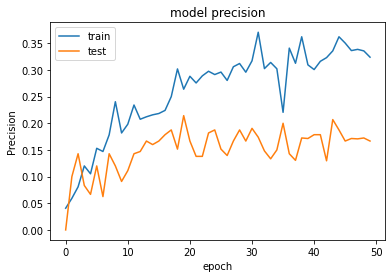

In [204]:
import matplotlib.pyplot as plt
plt.plot(history.history['precision_2'])
plt.plot(history.history['val_precision_2'])
plt.title('model precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

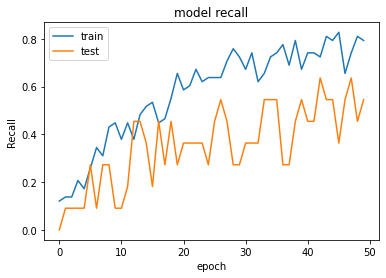

In [205]:
import matplotlib.pyplot as plt
plt.plot(history.history['recall_2'])
plt.plot(history.history['val_recall_2'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

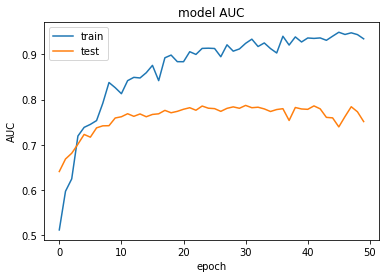

In [208]:
import matplotlib.pyplot as plt
plt.plot(history.history['auc_3'])
plt.plot(history.history['val_auc_3'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

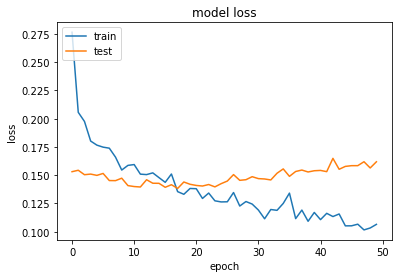

In [209]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()